In [35]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.patches import Patch
import matplotlib.patches as mpatches

In [50]:
df_ref = pd.read_csv('/Users/henryverdoodt/Documents/CODE/DATA/BOXPLOT/CF_solar_CNRM_1986_2015.csv')
df_model1 = pd.read_csv('/Users/henryverdoodt/Documents/CODE/DATA/BOXPLOT/CF_solar_CNRM_2070_2099.csv')
df_model2 = pd.read_csv('/Users/henryverdoodt/Documents/CODE/DATA/BOXPLOT/CF_solar_EARTH_2070_2099.csv')
df_model3 = pd.read_csv('/Users/henryverdoodt/Documents/CODE/DATA/BOXPLOT/CF_solar_HadGEM_2070_2099.csv')
print(df_ref.iloc[:, 0])
countries = df_ref.columns
x = range(len(countries))
print(list(x))

0        0.000000
1        0.000000
2        0.003426
3        0.052339
4        0.077995
           ...   
87651    0.330911
87652    0.394037
87653    0.086020
87654    0.000000
87655    0.000000
Name: PT, Length: 87656, dtype: float64
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


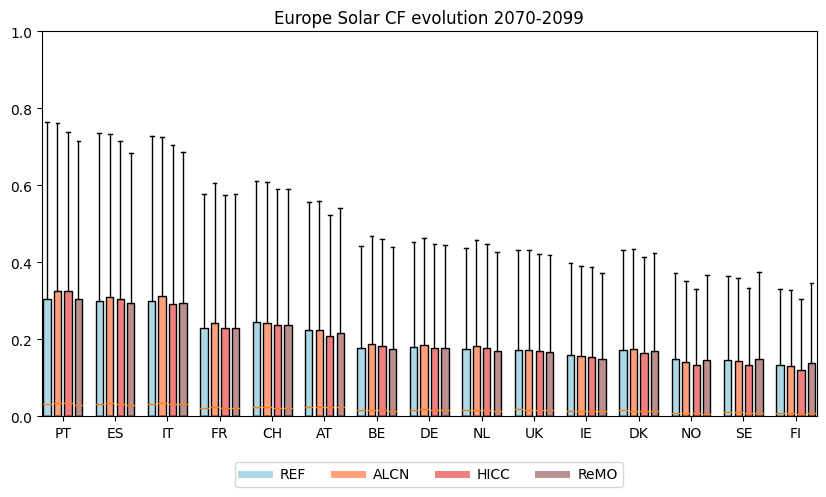

In [51]:
# Create a figure and subplots
countries = df_ref.columns
x = range(len(countries))
width = 0.7
spacing = 1.2
outliers = False

fig, ax = plt.subplots(figsize=(10, 5))

# Plot box plots
flier_properties = dict(marker='o', markerfacecolor='white', markeredgecolor='black', markersize=3, linewidth=0.2)

box_colors = ['lightblue', 'lightsalmon', 'lightcoral', 'rosybrown']  # Colors for the box plots

handles = []
for i in range(len(countries)):
    if i > 0:
        s = 1
    else:
        s = 0
    bp = ax.boxplot([df_ref.iloc[:, i], df_model1.iloc[:, i], df_model2.iloc[:, i], df_model3.iloc[:, i]],
                    positions=[1+((4+s)*i), 2+((4+s)*i), 3+((4+s)*i), 4+((4+s)*i)], widths=width, patch_artist=True,
                    showfliers=outliers, flierprops=flier_properties)

    # Set colors for box plots
    for box, color in zip(bp['boxes'], box_colors):
        box.set(facecolor=color)
    
    # Add box color patch to the legend handles
    handles.append(mpatches.Patch(color=color))

# Set the legend
legend_labels = ['REF (1986-2015)', 'ALCN (2070-2099)', 'HICC (2070-2099)', 'ReMO (2070-2099)']
#ax.legend(handles, legend_labels, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)

ax.set_ylim(0, 1)
ax.set_xticks([2.5 + (4+s)*i for i in x])
ax.set_xticklabels(countries)

# Add color line below the graph
color_labels = ['REF', 'ALCN', 'HICC', 'ReMO'] #['REF (1986-2015)', 'ALCN (2070-2099)', 'HICC (2070-2099)', 'ReMO (2070-2099)']
for i, color in enumerate(box_colors):
    plt.plot([], [], color=color, label=color_labels[i], linewidth=5)

# Show the legend for the color line
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=4)

# Set the title and y-axis label
plt.title('Europe Solar CF evolution 2070-2099') # Europe_Solar_CF_evolution_2070_2099_Boxplot
plt.show()